# Airbnb Open EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Airbnb_Open_Data.csv')
pd.set_option('display.max_columns', None)
df.columns = [col.lower().replace(" ","_") for col in df.columns]

df.head(2)

C:\Users\cjhun\AppData\Local\Temp\ipykernel_19352\967145603.py:6: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

## Data Cleaning

In [3]:
# calculate the % missing values
percentage_result = df.isnull().sum()/df.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,id,0.000000
1,name,0.243667
2,host_id,0.000000
3,host_identity_verified,0.281679
4,host_name,0.395715
5,neighbourhood_group,0.028265
6,neighbourhood,0.015595
7,lat,0.007797
8,long,0.007797
9,country,0.518524


In [4]:
df.describe()

,id,host_id,lat,long,construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [5]:
# Checking for duplicated rows
df.duplicated().sum()

541

In [6]:
# Dropping duplicated rows
df.drop_duplicates(inplace=True)

In [7]:
# Double checking for duplicate rows
df.duplicated().sum()

0

In [8]:
# Fixing inconsistencies
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

df['service_fee'] = df['service_fee'].str.replace('$','')
df['service_fee'] = df['service_fee'].str.replace(',','')

df['price'] = df['price'].astype(float)
df['service_fee'] = df['service_fee'].astype(float)

C:\Users\cjhun\AppData\Local\Temp\ipykernel_19352\1136127875.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')
C:\Users\cjhun\AppData\Local\Temp\ipykernel_19352\1136127875.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service_fee'] = df['service_fee'].str.replace('$','')


In [9]:
df.isna().sum()

id                                     0
name                                 250
host_id                                0
host_identity_verified               289
host_name                            404
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       400
number_of_reviews                    183
last_review                        15832
reviews_per_month                  15818
review_rate_number                   319
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [10]:
df.dropna(subset=['last_review', 'reviews_per_month'], inplace=True)

# Drop rows that have less than 3 non-NaN values
df.dropna(thresh=3, inplace=True)

In [11]:
df.isna().sum()

id                                    0
name                                214
host_id                               0
host_identity_verified              243
host_name                           325
neighbourhood_group                  24
neighbourhood                        16
lat                                   7
long                                  7
country                             488
country_code                        115
instant_bookable                     92
cancellation_policy                  66
room_type                             0
construction_year                   185
price                               220
service_fee                         241
minimum_nights                      337
number_of_reviews                    59
last_review                           0
reviews_per_month                     0
review_rate_number                  279
calculated_host_listings_count      261
availability_365                    178
house_rules                       45407


In [12]:
df.drop(columns=['license'], inplace=True)

In [13]:
df['neighbourhood_group'] = df['neighbourhood_group'].replace({'brookln': 'Brooklyn',
                                                               'manhatan': 'Manhattan'})

In [14]:
df['availability_365'].describe()

count    86035.000000
mean       141.989086
std        133.929587
min        -10.000000
25%          6.000000
50%        101.000000
75%        266.000000
max       3677.000000
Name: availability_365, dtype: float64

In [15]:
df['host_name'].value_counts()

Michael              737
David                616
John                 509
Alex                 459
Karen                414
                    ... 
Nadezhda               1
Rodrigue               1
Rebecca And Jolie      1
Eren                   1
Gpa                    1
Name: host_name, Length: 11779, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86213 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              86213 non-null  int64  
 1   name                            85999 non-null  object 
 2   host_id                         86213 non-null  int64  
 3   host_identity_verified          85970 non-null  object 
 4   host_name                       85888 non-null  object 
 5   neighbourhood_group             86189 non-null  object 
 6   neighbourhood                   86197 non-null  object 
 7   lat                             86206 non-null  float64
 8   long                            86206 non-null  float64
 9   country                         85725 non-null  object 
 10  country_code                    86098 non-null  object 
 11  instant_bookable                86121 non-null  object 
 12  cancellation_policy            

In [17]:
# Dropping unnecessary columns
df.drop(columns=['name','country','country_code', 'house_rules', 'host_id'], inplace=True)

In [18]:
# Fill missing values in 'instant_bookable' column with the most frequent value
most_frequent_value = df['instant_bookable'].mode()[0]
df['instant_bookable'].fillna(most_frequent_value, inplace=True)

In [19]:
df['host_identity_verified'].value_counts()

unconfirmed    43035
verified       42935
Name: host_identity_verified, dtype: int64

In [20]:
# Fill missing values in 'host_identity_verified' column with False
df['host_identity_verified'].fillna("unconfirmed", inplace=True)

In [21]:
# Checking for any inconsistencies
cols = df.select_dtypes(include=['object']).columns

for col in cols:
    print(f'{col.lower()}')
    print(df[col].value_counts())
    print('\n')

host_identity_verified
unconfirmed    43278
verified       42935
Name: host_identity_verified, dtype: int64


host_name
Michael              737
David                616
John                 509
Alex                 459
Karen                414
                    ... 
Nadezhda               1
Rodrigue               1
Rebecca And Jolie      1
Eren                   1
Gpa                    1
Name: host_name, Length: 11779, dtype: int64


neighbourhood_group
Manhattan        35788
Brooklyn         35767
Queens           11444
Bronx             2344
Staten Island      846
Name: neighbourhood_group, dtype: int64


neighbourhood
Bedford-Stuyvesant        6968
Williamsburg              6548
Harlem                    4748
Bushwick                  4106
Hell's Kitchen            3278
                          ... 
Gerritsen Beach              3
Glen Oaks                    2
Woodrow                      1
Chelsea, Staten Island       1
New Dorp                     1
Name: neighbourhood, Lengt

In [46]:
# Filtering out the outliers
df = df[df['availability_365'] != 3677] # outliar
df = df[(df['minimum_nights'] < 365) & (df['minimum_nights'] > 0)] # only 365 days in a year, can't be negative
df = df[(df['availability_365'] < 365) & (df['availability_365'] > 0)] # same thing here
df = df[(df['reviews_per_month'] < 31) & (df['reviews_per_month'] > 0)] # max 31 days in a month

In [47]:
df['reviews_per_month'].sort_values(ascending=False)

49605    30.51
42077    27.95
74684    27.95
50070    25.62
53078    25.23
         ...  
318       0.01
2135      0.01
3196      0.01
3331      0.01
69309     0.01
Name: reviews_per_month, Length: 62989, dtype: float64

In [48]:
df.describe()

,id,lat,long,construction_year,price,service_fee,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
count,6.298900e+04,62982.000000,62982.000000,62858.000000,62833.000000,62828.000000,62989.000000,62949.000000,62989.000000,62793.000000,62805.000000,62989.000000
mean,2.878349e+07,40.726933,-73.947047,2012.505409,626.379403,125.240450,7.349569,37.801903,1.627885,3.288551,8.493591,168.022305
std,1.606036e+07,0.057481,0.053028,5.775229,331.245438,66.242223,13.884149,55.330217,1.726357,1.280636,33.384572,117.491778
min,1.001254e+06,40.504560,-74.249840,2003.000000,50.000000,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000
25%,1.506897e+07,40.686670,-73.982590,2008.000000,341.000000,68.000000,2.000000,4.000000,0.330000,2.000000,1.000000,61.000000
50%,2.999764e+07,40.721345,-73.953210,2013.000000,626.000000,125.000000,3.000000,15.000000,1.010000,3.000000,1.000000,157.000000
75%,4.185994e+07,40.762730,-73.928600,2018.000000,914.000000,183.000000,5.000000,49.000000,2.440000,4.000000,3.000000,278.000000
max,5.736742e+07,40.916970,-73.705220,2022.000000,1200.000000,240.000000,364.000000,884.000000,30.510000,5.000000,332.000000,364.000000


## Analysis

### Functions for plotting graphs

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_chart(column_name: str, hue: str = None, top_values: int = None, palette: str = "flare", 
                   show_grid: bool = True, figsize: tuple = (16, 9), bar_font_size: int = 14, 
                   bar_angle: int = 0, angle: int = 45):
    """
    Plot bar chart for the specified column.

    Parameters:
        column_name (str): Name of the column to plot.
        hue (str): Variable in data to map plot aspects to different colors.
        top_values (int): Number of top values to consider.
        palette (str): Palette name for the plot.
        show_grid (bool): Whether to display grid lines.
        figsize (tuple): Figure size.
        bar_font_size (int): Font size for bar labels.
        bar_angle (int): Rotation angle for bar labels.
        angle (int): Rotation angle for x-axis labels.
    """

    # Create figure and axes
    fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor=(247/255, 247/255, 247/255))
    
    # Set face color for the axes
    ax.set_facecolor((247/255, 247/255, 247/255))
    
    # Get value counts
    if top_values is not None:
        counts = df[column_name].value_counts().iloc[:top_values]
    else:
        counts = df[column_name].value_counts()
        
    # Plot bar chart
    bar_ax = sns.barplot(x=counts.keys(), y=counts, palette=palette, ax=ax, hue=df[hue] if hue is not None else None) 
    
    # Add labels to bars
    for i in bar_ax.containers:
        bar_ax.bar_label(i, rotation=bar_angle, fontsize=bar_font_size)
        
    # Set x-axis labels rotation and font size
    plt.xticks(rotation=angle)
    
    # Set labels for x and y axes
    plt.xlabel(f"{column_name}", fontweight="bold")
    plt.ylabel("count", fontweight="bold", fontsize=15)
    
    # Set title
    plt.title(f"Top {top_values} {column_name}" if top_values is not None else f"{column_name}", fontsize=20)
    
    # Show grid if required
    if show_grid:
        plt.grid()
    
    # Show plot
    plt.show()


In [26]:
import matplotlib.pyplot as plt

def plot_pie_chart(column_name: str, startangle: int = 45, loc: str = "center", explodes: float = 0.09, colors: list = None):
    """
    Plot pie/donut chart for the specified column.

    Parameters:
        column_name (str): Name of the column to plot.
        startangle (int): The angle by which the start of the pie is rotated, degrees counterclockwise from the x-axis.
        loc (str): Location of the legend.
        explodes (float): Spacing between slices.
        colors (list): List of colors for the pie chart.
    """

    # Get values and keys
    values = df[column_name].value_counts()
    keys = values.keys()
    total_records = df[column_name].count()

    # Calculate labels
    labels = ["{0} - {1:1.2f} %".format(i, j / total_records * 100) for i, j in zip(keys, values)]
    explodes = [explodes / len(keys) for i in range(len(keys))]

    # Create subplots with defined figure size
    plt.subplots(figsize=(16, 9))

    # Draw the pie chart
    patches, texts = plt.pie(values, startangle=startangle, explode=explodes, colors=colors)

    # Draw circle
    center_circle = plt.Circle(xy=(0, 0), radius=0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Set title
    plt.title(column_name, fontweight="bold")

    # Add legend
    plt.legend(patches, labels, loc=loc)

    # Show plot
    plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def plot_line_chart(column_name, xlabel, ylabel, title):
    """
    Plot line chart for the specified column.

    Parameters:
        column_name (str): Name of the column to plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
    """

    # Get values and keys
    value = df[column_name].value_counts(ascending=False).sort_index()
    keys = np.array(value.keys(), dtype=np.int16)

    # Create figure and axes
    fig = plt.figure(facecolor=(247/255, 247/255, 247/255), figsize=(16, 7))
    ax = plt.subplot(1, 1, 1)
    
    # Set face color for the axes
    ax.set_facecolor((247/255, 247/255, 247/255))
    
    # Plot line chart
    ax.plot(value, 'o--', c="black", markerfacecolor='none', markersize=12, markeredgecolor="red", markeredgewidth=3, linewidth=2)
    
    # Set labels and title
    plt.xlabel(xlabel, fontsize=20, fontweight="bold")
    plt.ylabel(ylabel, fontsize=20, fontweight="bold")
    plt.xticks(ticks=keys, fontsize=12, rotation=15)
    plt.title(title, fontsize=24, fontweight="bold")
    
    # Show plot
    plt.show()

### Instant Bookable

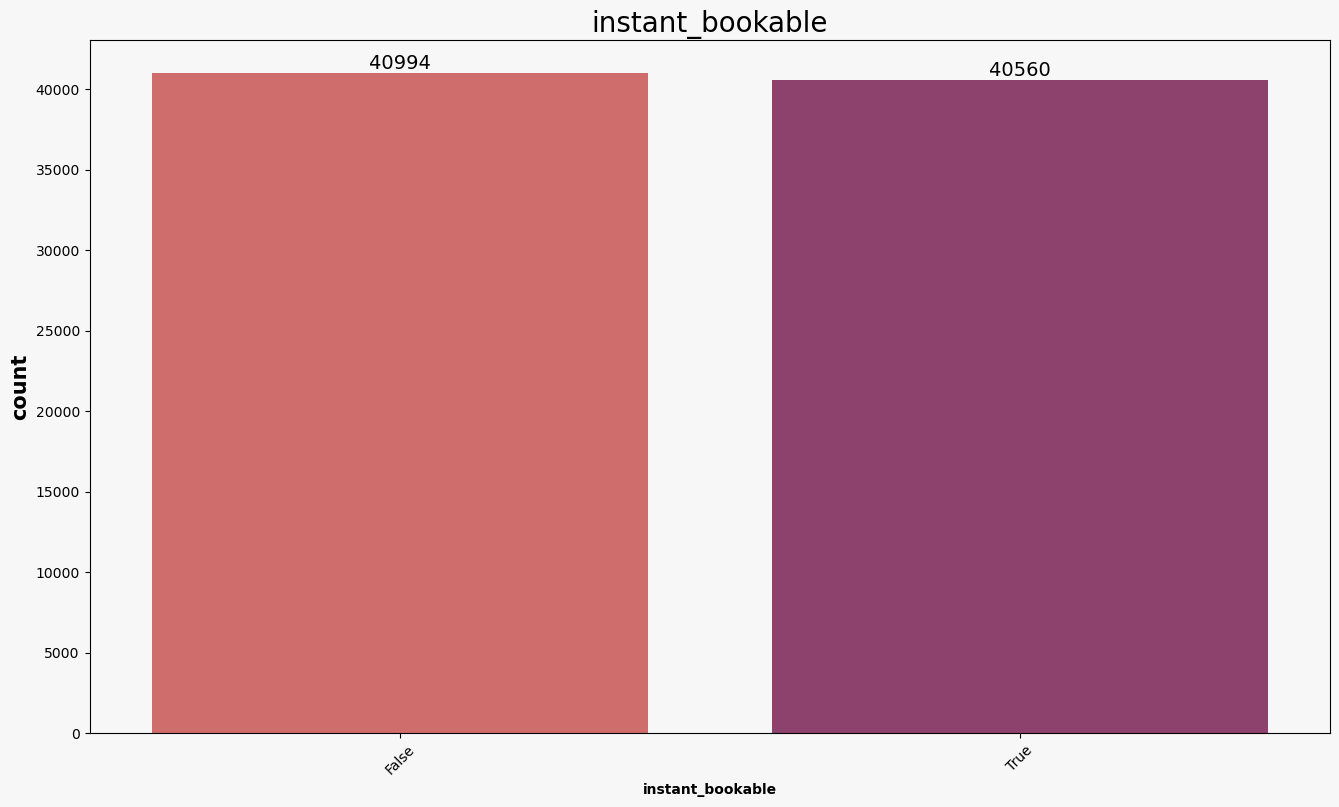

In [28]:
plot_bar_chart(column_name='instant_bookable', show_grid=False)

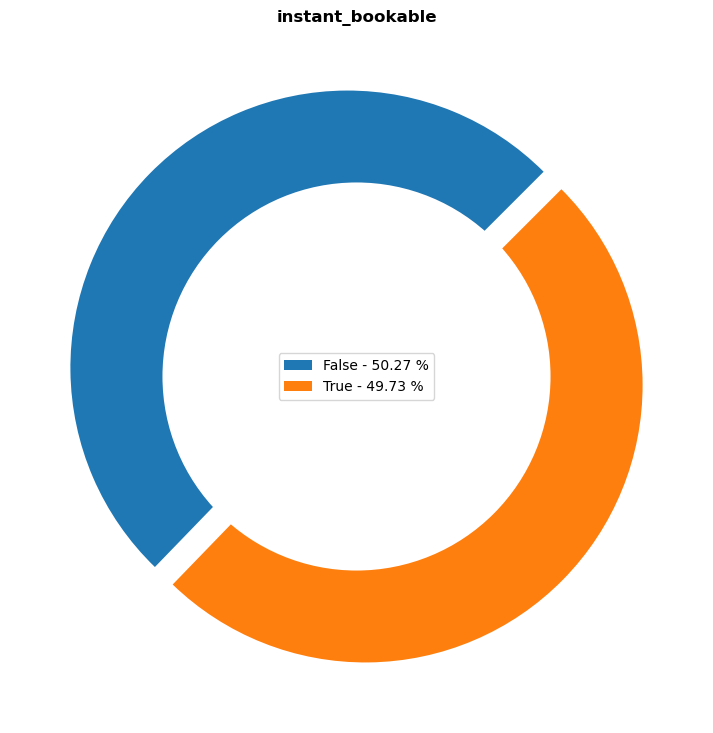

In [29]:
plot_pie_chart("instant_bookable")

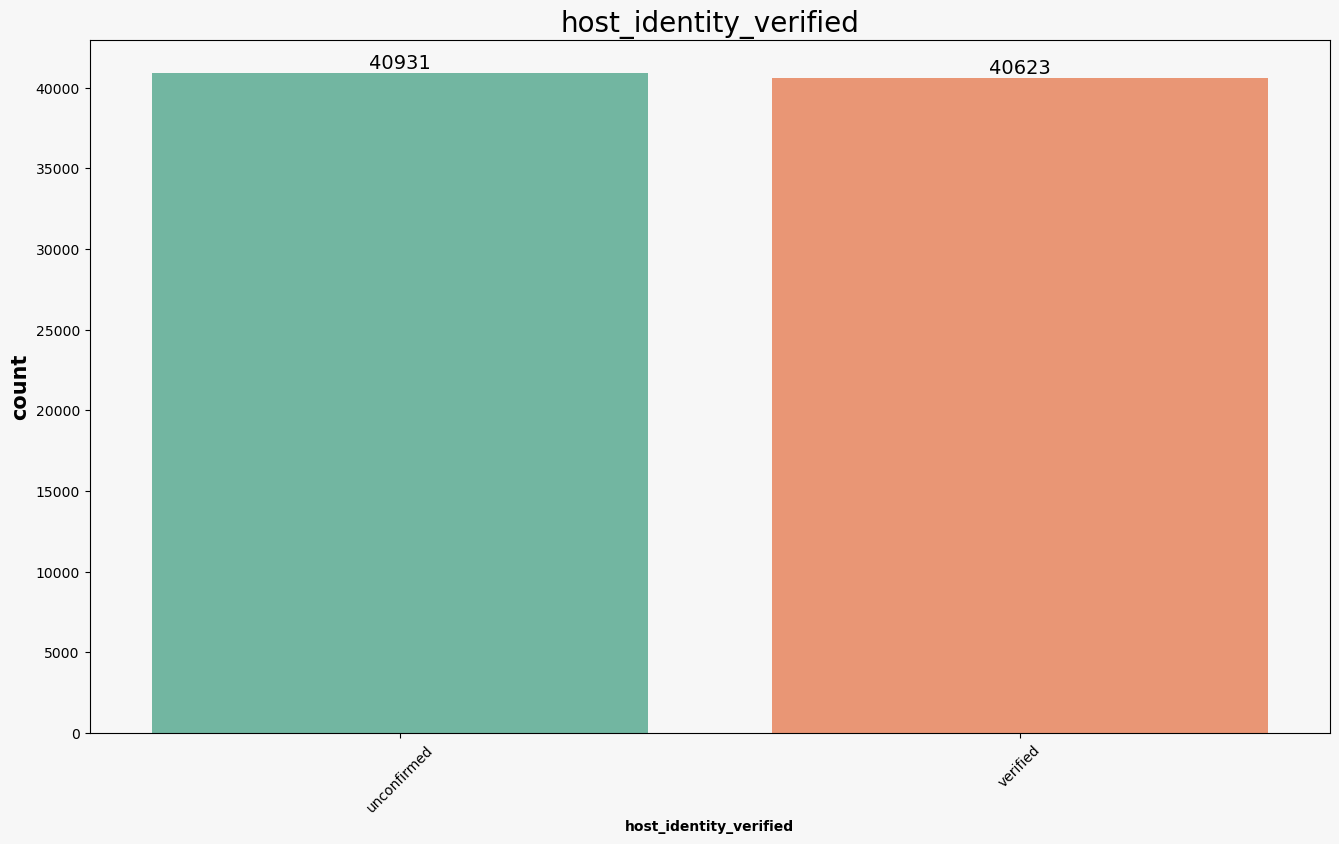

In [31]:
plot_bar_chart(column_name='host_identity_verified', palette='Set2', show_grid=False)

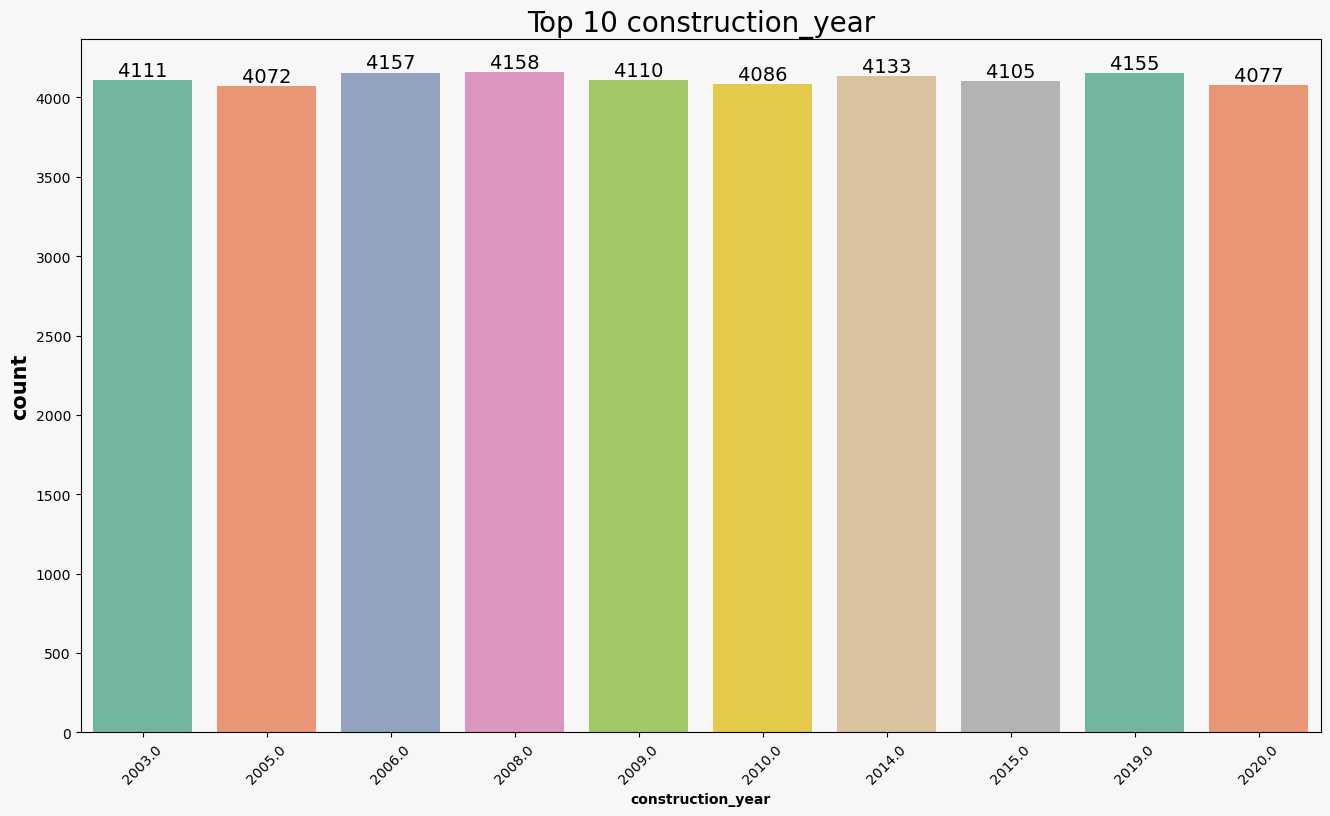

In [33]:
plot_bar_chart(column_name='construction_year', top_values=10, palette='Set2', show_grid=False)

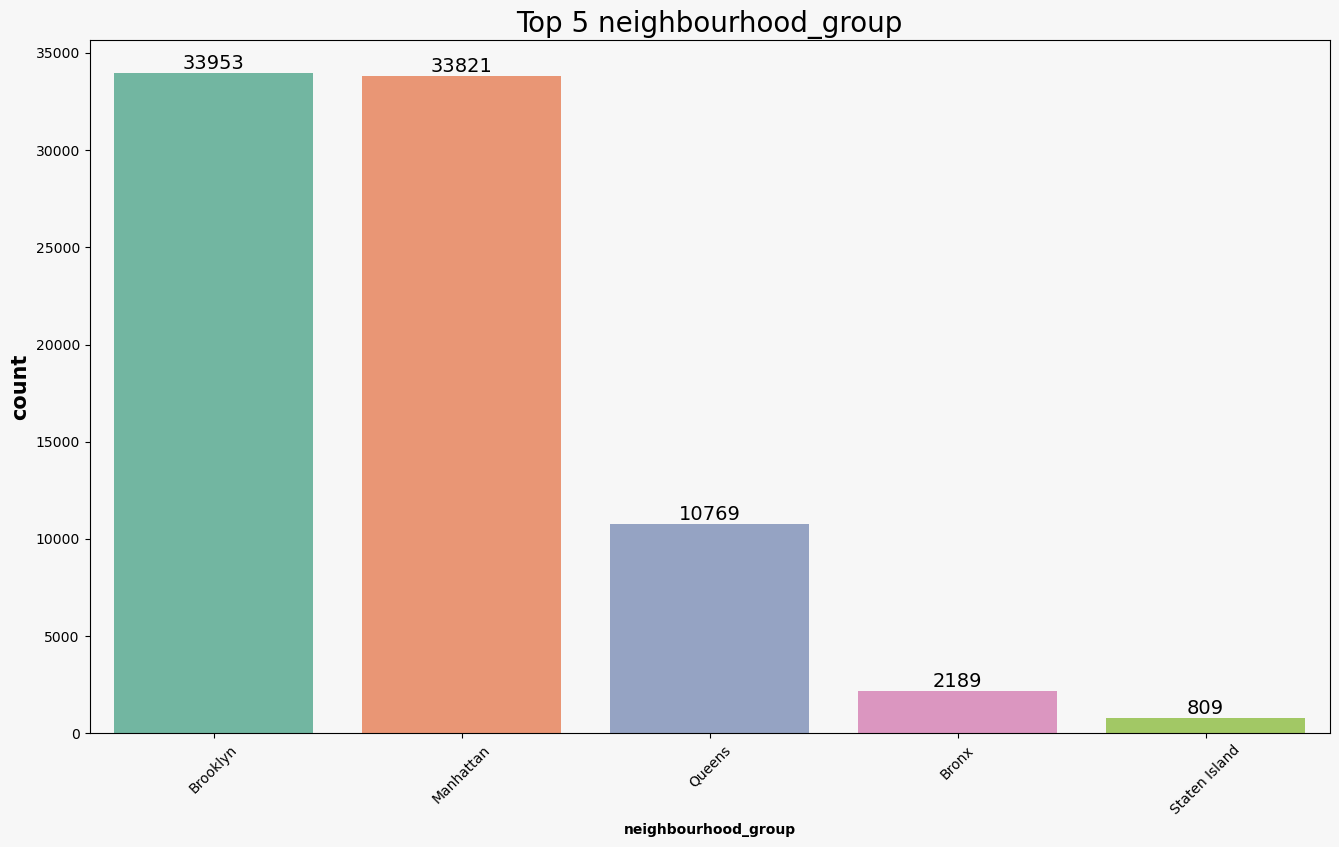

In [34]:
plot_bar_chart(column_name='neighbourhood_group', top_values=5, palette='Set2', show_grid=False)

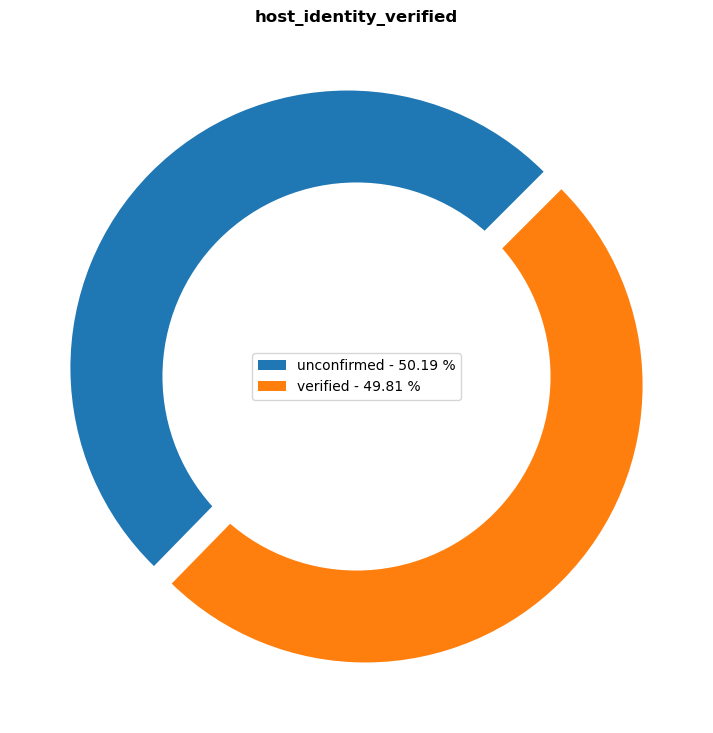

In [35]:
plot_pie_chart("host_identity_verified")

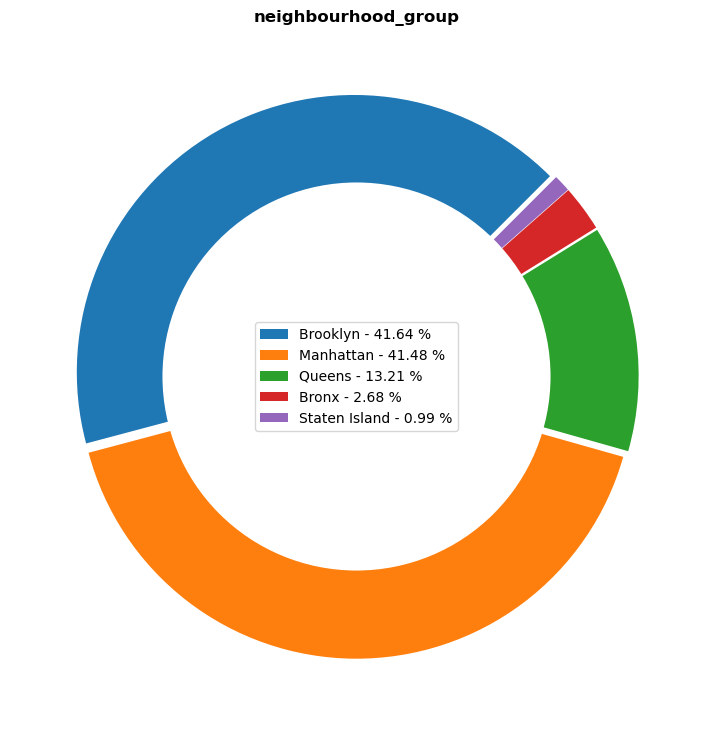

In [36]:
plot_pie_chart("neighbourhood_group")

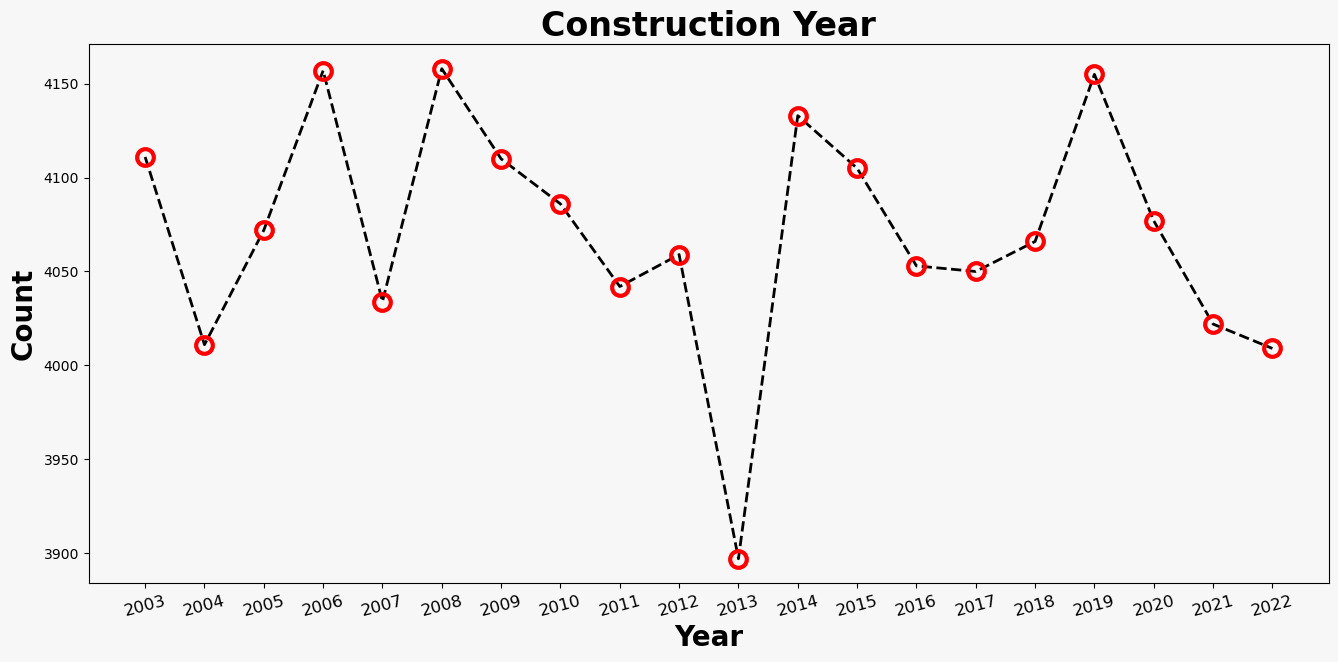

In [37]:
plot_line_chart("construction_year", "Year", "Count", "Construction Year")